**Inference of an unknown vector using noisy measurements**

In this code, we are going to show how to infer the mean of a bivariate Gaussian distribution, given only samples of the distribution and the covariance matrix. Mathematically, we consider $N$ vector-valued observations, $x_{i}\sim\mathcal{N}(x_{i}\mid\mu,C_{x})$ with $C_{x}$, given and a Gaussian prior on the mean, $\mu\sim\mathcal{N}(\mu;\mu_{0},C_{0})$.

The purpose of the exercise is to make an inference on the mean, thus we have to calculate the posterior $p\left(\mu\mid x_{1}\cdots x_{N}\right)$. Notice that this problem can be interpreted as the estimation of the position (the mean) of a target once we get a certain number of noisy measurements.

If you have any questions, you can contact the instructor.

The first thing we need to do is to import the necessary libraries. We will use numpy to generate the samples and matplotlib to plot the results. We will also use the magic command `%matplotlib inline` to show the plots in the notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This is an ancillary method used to plot the 95% confidence interval of the Gaussian distribution.

In [2]:
# Ancillary method, used for plotting the 95% confidence interval later
def get_elipse(covar, mean):
    eigenval, eigenvec = np.linalg.eig(covar)
    # Get the largest and smalles eigenvalue and eigenvector
    largest_eigenvec = eigenvec[:, np.argmax(eigenval)]
    largest_eigenval = np.amax(eigenval)
    smallest_eigenvec = eigenvec[:, np.argmin(eigenval)]
    smallest_eigenval = np.amin(eigenval)
    angle = np.arctan2(largest_eigenvec[1], largest_eigenvec[0])
    if angle < 0:
        angle += 2 * np.pi  # So that the angle is between 0 and 2 * pi

    chisquare_val = 2.4477  # For the 95% confidence interval
    theta_grid = np.linspace(0, 2 * np.pi)
    phi = angle
    X0 = mean[0]
    Y0 = mean[1]
    a = chisquare_val * np.sqrt(largest_eigenval)
    b = chisquare_val * np.sqrt(smallest_eigenval)

    ellipse_x = np.vstack([a * np.cos(theta_grid), b * np.sin(theta_grid)]).T

    R = np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])

    r_ellipse = ellipse_x @ R

    return r_ellipse, X0, Y0

Let us start by generating the samples. We will generate the mean of the distribution from a Gaussian distribution with mean $\left(\frac{1}{2}, \frac{1}{2}  \right)$ and covariance $0.1 \cdot C_{0}$, and then we will generate the samples from a Gaussian distribution with mean $\mu$ and covariance $C_{x}$.

In [ ]:
# Set the parameters
n_samples = 100  # Number of samples we obtain
mu_0 = np.array([0, 0]).reshape([2, 1])  # Prior mean parameter
c_0 = np.array([[0.1, 0], [0, 0.1]])  # Prior covar parameter
c_x = 0.01 * np.array([[2, 1], [1, 1]])  # Covariance of the samples (known to us)

# Second, sample the actual mean value
mu = np.random.multivariate_normal(mean=np.array([0.5, 0.5]), cov=0.1 * c_0, size=1).T  # Generate the mean
# And now, generate our observable: the samples
x = np.random.multivariate_normal(mean=np.squeeze(mu), cov=c_x, size=n_samples).T  # Values generated

In order to estimate the mean $\mu$ using the samples $x_i$, let us remember that the product of two (or several) Gaussian distributions is:

$p\left(\mu\mid x_{1}\cdots x_{N}\right)\propto p\left(x_{1}\cdots x_{N}\mid\mu\right)p\left(\mu\right)=\underset{i}{\prod}p\left(x_{i}\mid\mu\right)p\left(\mu\right)=\underset{i}{\prod}\frac{1}{\sqrt{2\pi\det\left(C_{x}\right)}}\exp\left[-\frac{1}{2}\left(x_{i}-\mu\right)^{T}C_{x}^{-1}\left(x_{i}-\mu\right)\right]\times\frac{1}{\sqrt{2\pi\det\left(C_{0}\right)}}\exp\left[-\frac{1}{2}\left(\mu-\mu_{0}\right)^{T}C_{0}^{-1}\left(\mu-\mu_{0}\right)\right]$

whose characterization is known to us:

$p\left(\mu\mid x_{1}\cdots x_{N}\right)=\mathcal{N}\left(\mu;\mu_{N},C_{N}\right) \quad \begin{cases}
C_{N}^{-1}=C_{0}^{-1}+NC_{x}^{-1}\\
\mu_{N}=C_{N}\left(C_{x}^{-1}\underset{i}{\sum}x_{i}+C_{0}^{-1}\mu_{0}\right)
\end{cases}$

where $C_{N}$ and $\mu_{N}$ are the covariance and mean of the posterior distribution, respectively.

Thus, in order to estimate the posterior, we only need to apply these two equations as follows:

In [ ]:
# estimate the posterior
c_n = np.linalg.inv(np.linalg.inv(c_0) + n_samples * np.linalg.inv(c_x))
mu_n = c_n @ (np.linalg.inv(c_x) @ np.sum(x, axis=1).reshape([2, 1]) + np.linalg.inv(c_0) @ mu_0)

Now, we can plot the results. We will plot the samples, the actual mean and the posterior mean. We will also plot the 95% confidence interval of the prior and posterior distributions.

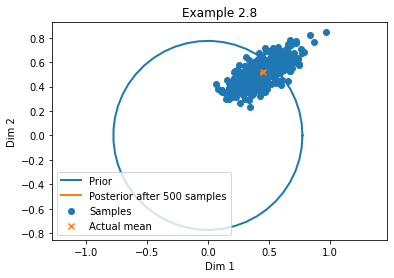

In [3]:
# Plotting
plt.scatter(x[0, :], x[1, :], marker='o', label='Samples')
plt.scatter(mu[0], mu[1], marker='x', label='Actual mean')
r_ellipse, X0, Y0 = get_elipse(c_0, mu_0)
plt.plot(r_ellipse[:, 0] + X0, r_ellipse[:, 1] + Y0, linewidth=2, label='Prior')
r_ellipse, X0, Y0 = get_elipse(c_n, mu_n)
plt.plot(r_ellipse[:, 0] + X0, r_ellipse[:, 1] + Y0, linewidth=2, label='Posterior after ' + str(n_samples) + ' samples')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend(loc='lower left')
plt.title('Inferring the mean from noisy samples')
plt.axis('equal')
plt.show()